I referenced the Anisotropic's kernel. His Kernel is https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial

## Introduction

This competition is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the ***probability that a driver will initiate an insurance claim in the next year***

This notebook will aim to provide some interactive charts and analysis of the competition data by way of the Python visualisation library Plot.ly and hopefully bring some insights and beautiful plots that others can take and replicate. Plot.ly is one of the main products offered by the software company - Plotly which specializes in providing online graphical and statistical visualisations (charts and dashboards) as well as providing an API to a whole rich suite of programming languages and tools such as Python, R, Matlab, Node.js etc.

Listed below for easy convenience are links to the various Plotly plots in this notebook:

- Simple horizontal bar plot - Used to inspect the Target variable distribution
- Correlation Heatmap plot - Inspect the correlation between the different features
- Scatter plot - Compare the feature importances generated by Random Forest and Gradient-Boosted model
- Vertical bar plot - List in Descending order, the importance of the various features.

The themes in this notedbook can be briefly summarized follows:
1. **Data Quality Checks**: Visualizing and evaluating all missing/Null values (values that are -1)
2. **Feature inspection and filtering**: Correlation and feature Mutual information plots against the target variable. Inspection of the Binary, categorical and other variables.
3. **Feature importance ranking via learning models**; Building a Random Forest and Gradient Boosted model to help us rank features based off the learning process.

In [1]:
# Let us load in the relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
# You can plot your graphs offline inside a Jupyter Notebook Environment
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

Let us load in the training data provided using Pandas:

In [2]:
train = pd.read_csv('./data/train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print('The train dataset contains {} rows and {} columns'.format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## 1. Data Quality Checks
### Null or missing values check
As part of our quality checks, let us quick look at whether there are any null values in the train dataset as follows:

In [4]:
# any() applied twice to check run the isnull check across all columns.
train.isnull()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
595208,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
595209,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
595210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
train.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

In [6]:
train.isnull().any().any()

False

- Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as "Values of -1 indicate that the feature was missing from the observation". Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [7]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

Next, we can use resident Kaggler's Aleksey Bilogur - creator of the "Missingno" package which is most useful and convenient tool in visualizing missing values in the dataset, so check it out.

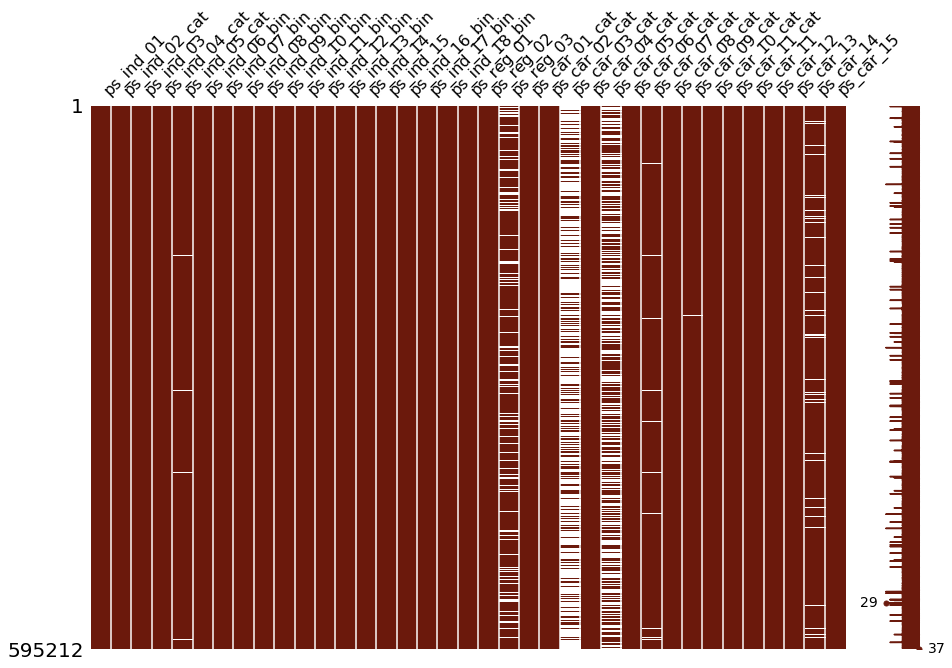

In [8]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(15,10), color=(0.42, 0.1, 0.05))

As we can see, the missing values now become much more apparent and clear when we visualize it, where the empty whithe bands (data that is missing) superposed on the vertical dark bands (non-missing data) reflect the nullity of the data in that particular column. In this instance, we can observe that there are 7 features out of the 59 total features (although as rightly pointed out by Justin Nafe in the comments section there are really a grand total of 13 columns with missing values) that actually contained null values. This is due to the fact that the missingno matrix plot can only comfortable fit in approximately 40 odd features to one plot after which some columns may be excluded, and hence the remaining 5 null columns have been excluded. To visualize all nulls, try chaning the figsize argument as weel as tweaking how we slice the dataframe.

For the 7 null columns that we are able to observe, they are hence listed here as follows:

**ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14**

Most of the missing values occur in the columns suffixed with _cat._ One should really take further note of the columns ps_re_93, ps_car_03_cat and ps_car_05_cat.Evinecd from the ration of whited to dark bands, it is very apparent that a big majority of values are missing from these 3 columns, and therefore a blanket replacement of -1 for the nulls might not be a very good strategy. 

#### Target variable inspection
Another standard check normally conducted on the data is with regards to our target variable, where in this case, the column is conveniently titled "target". The target value also comes by the moniker of class/label/correct answer and is used in supervised learning models along with the correspoding data that is given (in our case all out train data except the id column) to learn the function that best maps the data to our target in the hope that this learned function can generalize and predict well with new unseen data.

In [9]:
data = [go.Bar(
            # array([0, 1], dtype=int64)
            x = train['target'].value_counts().index.values,
            # array([573518,  21694], dtype=int64)
            y = train['target'].value_counts().values,
            text = 'Distribution of target variable'
    )]
layout = go.Layout(title = 'Target variable distribution')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

In [10]:
train['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

The target variable is rather imbalanced so it might be something to keep in mind. An imbalanced target will prove quite

#### Datatype check

This chekc is carried out to see what kind of datatypes the train set is comprised of: integers or characters or floats just ot gain a better overview of the data we were parovided with. one trick to obtain counts of the unique types in a python sequence is to use the Counter method, when you import the **Collections** module as follows:

In [11]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [12]:
train.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [13]:
train.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int6

As alluded to above, there are a total of 59 columns that make up the train dataset and as we can observe from this check, the features/columns consist of only two datatypes - intergers and floats.

Another point to note is that Porto Seguro has actually provided us data with headers that come suffixed with abbreviattions such as "_bin", "_cat", and "_reg", where they have given us a rough explanation that _bin indicates binary features while _cat indicates categorical features whilst the rest are either continuous or ordinal features. Here I shall simplify this a bit further just by looking at float values (probably only the continuous features) and integer datatypes (binary, categorical dnd oridinal features)

In [14]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

### Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

#### Correlation of float features

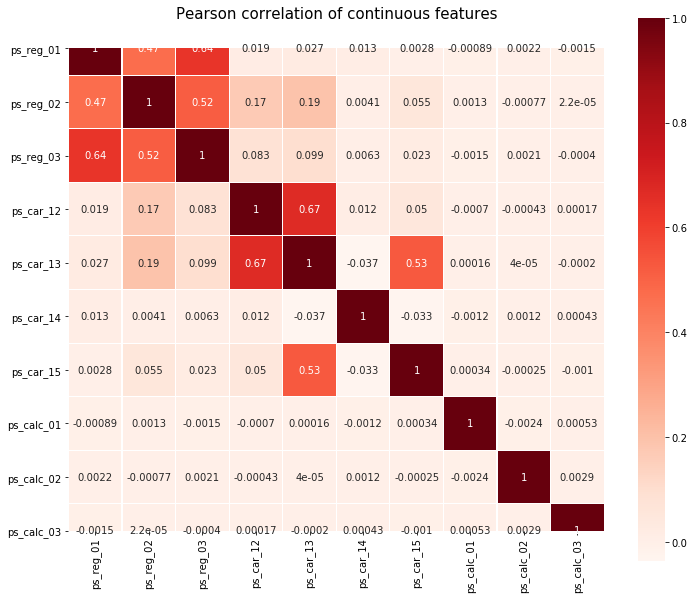

In [15]:
# sns.set(font_scale=1.1)
colormap = plt.cm.Reds
plt.figure(figsize=(12, 10))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidth=0.1, vmax=1.0, square=True,
           cmap=colormap, linecolor='white', annot=True);

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:
- (ps_reg_01, ps_reg_03)
- (ps_reg_02, ps_reg_03)
- (ps_car_12, ps_car_13)
- (ps_car_13, ps_car_15)

#### Correlation of integer features
For the columns of integer datatype, I shall now switch to using the Plotly library to show how one can also generate a heatmap of correlation values interactively. Much like our earlier Plotly plot, we generate a heatmap object by simply invoking the "go.Heatmap". Here we have to provide values to three different axes, where x and y axes take in the column names while the correlation value is provided by the z-axis. The colorscale attribute takes in keywords that correspond to different color palettes that you will see in the heatmap where in this example, I have used the Greys colorscale (others include Porland and Viridis - try it for yourself).

In [16]:
#train_int = train_int.drop(["id", "target"], axis=1)
# colormap = plt.cm.bone
# plt.figure(figsize=(21,16))
# plt.title('Pearson correlation of categorical features', y=1.05, size=15)
# sns.heatmap(train_cat.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
data = [
    go.Heatmap(
        z= train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
fig.show()

Similarly, we can observe that there are a huge number of columns that are not linearly correlated with each other at all, evident from the fact that we observe quite a lot of 0 value cells in our correlation plot. This is quite a useful observation to us, especially if we are trying to perform dimensionality reduction transformations such as Principal Component Analysis (PCA), this would require a certain degree of correlation. We can note some features of interest are as follows:  
**Negatively correlated features : ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin**  
One interesting aspect to note is that in our earlier analysis on nullity, ps_car_03_cat and ps_car_05_cat were found to contain many missing or null values. Therefore it should come as no surprise that both these features show quite a strong positive linear correlation to each other on this basis, albeit one that may not really reflect the underlying truth for the data.

### Mutual Information plots

Mutual information is another useful tool as it allows one to inspect the mutual information between the target variable and the corresponding feature it is calculated against. For classification problems, we can conveniently call Sklearn's mutual_info_classif method which measures the dependency between two random variables and ranges from zero (where the random variables are independent of each other) to higher values (indicate some dependency). This therefore will help give us an idea of how much information from the target may be contained within the features.
The sklearn implementation of the mutual_info_classif function tells us that it "relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances", where you can go into more detail on the official sklearn page in the [link here.](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)

In [17]:
mf = mutual_info_classif(train_float.values,train.target.values,n_neighbors=3, random_state=17 )
print(mf)

[0.01402035 0.00431986 0.0055185  0.00778454 0.00157233 0.00197537
 0.01226    0.00553038 0.00545101 0.00562139]


### Binary features inspection
Another aspect of the data that we may want to inspect would be the columns that only contain binary values, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly barplot of these binary values as follows:

In [18]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())
    
print(zero_list)
print(one_list)

[360852, 442223, 497644, 484917, 594990, 594205, 589594, 594648, 201882, 523143, 503879, 522342, 221514, 265356, 424278, 387469, 503955]
[234360, 152989, 97568, 110295, 222, 1007, 5618, 564, 393330, 72069, 91333, 72870, 373698, 329856, 170934, 207743, 91257]


In [19]:
trace1 = go.Bar(
    x=bin_col,
    y=zero_list,
    name='Zero Count')

trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One Count')

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables')

fig = go.Figure(data=data, layout=layout)
fig.show()

Here we observe that there are 4 features : ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. This begs the question of whether these features are useful at all as they do not contain much information about the other class vis-a-vis the target.

### Categorical and ordinal feature inspection

Let us first take a look at the features that are termed categorical as per their suffix "_cat".

### Feature importance via Random Forest

Let us now implement a Random Forest model where we fit the training data with a Random Forest Classifier and look at the ranking of the features after the model has finished training. This is a quick way of using an ensemble model (ensemble of weak decision tree learners applied under Bootstrap aggregated) which does not require much parameter tuning in obtaining useful feature importances and is also pretty robust to target imbalances. We call the Random Forest as follows:

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, 
                            min_samples_leaf=4, max_features=0.2,
                           n_jobs=-1, random_state=0)
rf.fit(train.drop(['id', 'target'], axis=1), train.target)
features = train.drop(['id', 'target'], axis=1).columns.values
print("----------Training Done---------")

----------Training Done---------


**Plot.ly Scatter Plot of feature importances**

Having trained the Random Forest, we can obtain the list of feature importances by invoking the attribute "featureimportances" and plot our next Plotly plot, the Scatter plot.

Here we invoke the command Scatter and as per the previous Plotly plots, we have to define our y and x-axes. However the one thing that we pay attention to in scatter plots is the marker attribute. It is the marker attribute where we define and hence control the size, color and scale of the scatter points embedded.

In [33]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
    xaxis= dict(
        ticklen= 5,
        showgrid=True,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        showgrid=True,
        zeroline=False,
        gridwidth=2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

Furthermore we could also display a sorted list of all the features ranked by order of their importance, from highest to lowest via the same plotly barplots as follows:

In [22]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features),
                                    reverse=False)))

In [23]:
x

[0.0003743181308508165,
 0.000658587568488969,
 0.0006631273358967262,
 0.0012870902040590282,
 0.0013468714834950239,
 0.001870133874931154,
 0.001989572452739753,
 0.002157913151265299,
 0.002257450267841548,
 0.002396248137555366,
 0.0024558305914006385,
 0.002469687345810993,
 0.0026302488825493274,
 0.0033942424985942323,
 0.003607748989459628,
 0.004198705181889577,
 0.006131305051533334,
 0.006161484578645829,
 0.008128745850432492,
 0.00859806923363534,
 0.00931835490969756,
 0.009404375939580238,
 0.00976021723144253,
 0.010077793671110571,
 0.01014094472565096,
 0.010594230122584794,
 0.011053805247045436,
 0.011555325103106582,
 0.011576231652990453,
 0.011709915331607012,
 0.012009756930235212,
 0.012160372455969666,
 0.013635548698960633,
 0.013920353817181067,
 0.015948843121933284,
 0.016475991648979886,
 0.01686434542269142,
 0.0169000533930654,
 0.01718398425858274,
 0.018552997743760267,
 0.019068010059436213,
 0.019470566624956092,
 0.019871398042689628,
 0.021438133

In [24]:
y

['ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_13_bin',
 'ps_calc_20_bin',
 'ps_ind_12_bin',
 'ps_calc_15_bin',
 'ps_car_10_cat',
 'ps_ind_18_bin',
 'ps_calc_16_bin',
 'ps_ind_14',
 'ps_calc_18_bin',
 'ps_calc_17_bin',
 'ps_calc_19_bin',
 'ps_car_08_cat',
 'ps_ind_09_bin',
 'ps_ind_08_bin',
 'ps_car_11',
 'ps_car_05_cat',
 'ps_calc_04',
 'ps_calc_06',
 'ps_car_09_cat',
 'ps_car_02_cat',
 'ps_calc_09',
 'ps_calc_12',
 'ps_calc_08',
 'ps_calc_05',
 'ps_ind_02_cat',
 'ps_calc_07',
 'ps_calc_03',
 'ps_calc_13',
 'ps_calc_01',
 'ps_calc_02',
 'ps_car_06_cat',
 'ps_ind_16_bin',
 'ps_calc_11',
 'ps_reg_01',
 'ps_ind_01',
 'ps_car_11_cat',
 'ps_calc_14',
 'ps_car_15',
 'ps_calc_10',
 'ps_ind_04_cat',
 'ps_ind_06_bin',
 'ps_car_03_cat',
 'ps_ind_07_bin',
 'ps_car_01_cat',
 'ps_ind_15',
 'ps_car_12',
 'ps_car_14',
 'ps_car_04_cat',
 'ps_car_07_cat',
 'ps_ind_03',
 'ps_reg_02',
 'ps_ind_17_bin',
 'ps_reg_03',
 'ps_ind_05_cat',
 'ps_car_13']

In [35]:
trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=x,
        colorscale='Viridis',
        reversescale=True
    ),
    name='Rndome Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
    width=900, height=2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

## Feature importance via Gradient Boosting Model
Just for curiosity, let us try another learning method in getting our feature importances, This time, we use a Graident Boosting Calssifier to fit to the training data. Gradient Boosting proceeds in a forward stagewise fashion, where at each stage regression tress are fitted on the gradient of the loss function (which defaults to the deviance in Sklearn implementation)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, 
                                min_samples_leaf=4, max_features=0.2, 
                                random_state=0)
gb.fit(train.drop(['id', 'target'], axis=1), train.target)
features = train.drop(['id', 'target'], axis=1).columns.values
print('---------------Training Done--------------')

---------------Training Done--------------


In [27]:
# Scatter plot
trace = go.Scatter(
    x=features,
    y=gb.feature_importances_,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=1,
        size=13,
        color=gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text=features
)

data = [trace]

layout= go.Layout(
    autosize= True,
    title='Gradient Boosting Machine Feature Importance',
    hovermode='closest',
    xaxis=dict(
        ticklen= 5,
        showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title='Feature Importance',
        ticklen=5,
        showgrid=False,
        zeroline=False,
        gridwidth=2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [28]:
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Gradient Boosting Classifer Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

Interestingly we observe that in both Random forest and Gradient Boosted learning models, the most important feature that both models picked out was the column : ps_car_13.

# Conclusion
We have performed quite an extensive inspection of the Porto Seguro dataset by inspecting for null values and data quality, investigated linear correlations between features, inspected some of the feature distributions as well as implemented a couple of learning models (Random forest and Gradient Boosting classifier) so as to identify features that the models deemed important.